# **CROP RECOMMENDATION SYSTEM**

 Here in these project deciding which crop to be cultivate and which will be successful depents on the soil.

In [ ]:
# Importing the Dependencies

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

**Data Collection And Data Processing**

In [ ]:
# Loading the dataset to a pandas dataframe

import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data sets/Crop_recommendation.csv')
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN


In [ ]:
#Checking any missing values

df.isna().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [ ]:
df.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

In [ ]:
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [ ]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
X=df.iloc[:,0:7]
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y=df.iloc[:,7]
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

**Scaling**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

**Training and Test data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
y_train.shape

(1540,)

In [ ]:
X_train.shape

(1540, 7)

In [ ]:
y_test.shape

(660,)

In [ ]:
X_test.shape

(660, 7)

In [ ]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
cor=df.corr()
cor

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

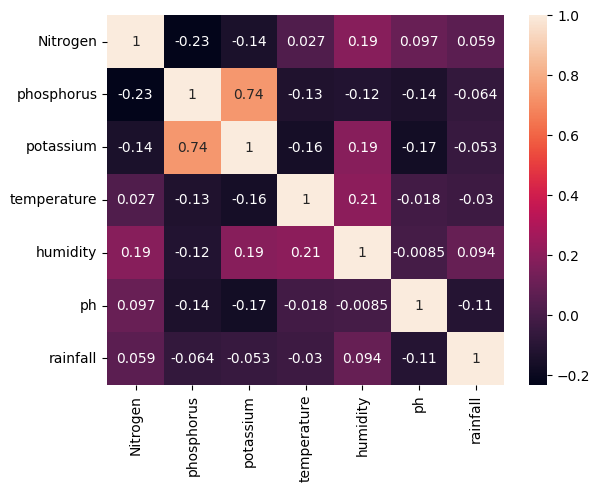

In [ ]:
sns.heatmap(cor,annot=True,cbar=True)

**Training Models**

In [ ]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)
bg=BaggingClassifier()

In [ ]:
models=[lg,knn,nb,sv,dt,rf,ad,bg]
for i in models:
  print("..................",i,"................")
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(accuracy_score(y_test,y_pred)*100)



.................. LogisticRegression() ................
93.48484848484848
.................. KNeighborsClassifier() ................
98.03030303030303
.................. GaussianNB() ................
99.54545454545455
.................. SVC() ................
98.7878787878788
.................. DecisionTreeClassifier() ................
98.93939393939394
.................. RandomForestClassifier(random_state=1) ................
99.69696969696969
.................. AdaBoostClassifier(random_state=1) ................
17.424242424242426
.................. BaggingClassifier() ................
99.54545454545455


In [ ]:
models=[lg,knn,nb,sv,dt,rf,ad,bg]
for i in models:
  print('..........',i,'..........')
  i.fit(X_train,y_train)
  print(classification_report(y_test,y_pred))

.......... LogisticRegression() ..........
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.97      1.00      0.98        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      1.00      0.97        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.98        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00     

**Visualization Of Model**

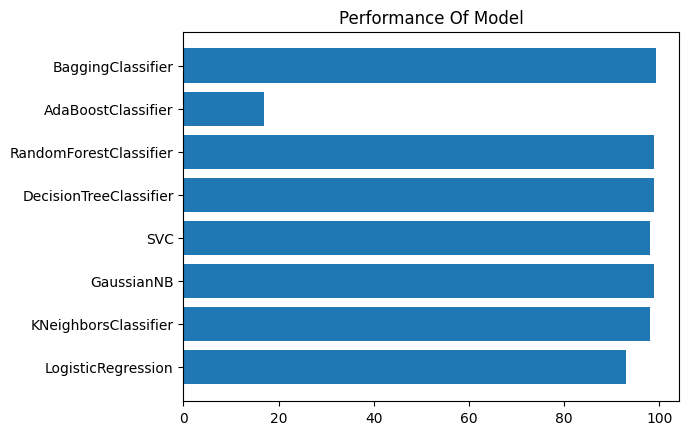

In [ ]:
Model=['LogisticRegression','KNeighborsClassifier','GaussianNB','SVC','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','BaggingClassifier']
Accuracy_Rate=[93,98,99,98,99,99,17,99.3]
plt.barh(Model,Accuracy_Rate)
plt.title("Performance Of Model")
plt.show()

# *Predictive system using high performance model (RandomForestClassifier with 99.6 accuarcy rate )*

In [ ]:
y_pred_new=rf.predict(scaler.transform([[118,	33,	30,	24.131797,	67.225123,	6.362608,	173.322839]]))
print("The Best crop can be cultivated according to the prediction is: ",y_pred_new)

Best crop can be cultivated according to the prediction is:  ['coffee']


**Just Applying HyperParameter Tuning To Analyze If There Is Any Change In Accuracy Rate For RandomForest**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
params={'n_estimators':[10, 17, 25, 33, 41, 48, 56, 64, 72, 80],'max_features':['auto', 'sqrt'],'max_depth': [2, 4],'min_samples_split': [2, 5],'bootstrap': [True, False]}
clf=GridSearchCV(rf,params,cv=3,verbose=2,n_jobs=4)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 64}

In [ ]:
rf_new=RandomForestClassifier(n_estimators=56,max_features='sqrt',max_depth=4,min_samples_split=2,bootstrap=True)
rf_new.fit(X_train,y_train)
y_pred_new=rf_new.predict(X_test)
y_pred

array(['grapes', 'muskmelon', 'kidneybeans', 'muskmelon', 'jute',
       'watermelon', 'kidneybeans', 'orange', 'jute', 'pigeonpeas',
       'pomegranate', 'jute', 'coffee', 'mango', 'mothbeans', 'banana',
       'banana', 'coconut', 'banana', 'orange', 'lentil', 'apple',
       'pomegranate', 'papaya', 'muskmelon', 'banana', 'grapes',
       'coconut', 'cotton', 'watermelon', 'maize', 'maize', 'muskmelon',
       'apple', 'mothbeans', 'cotton', 'mango', 'blackgram', 'mungbean',
       'orange', 'pigeonpeas', 'grapes', 'orange', 'papaya', 'coconut',
       'pomegranate', 'papaya', 'coffee', 'chickpea', 'jute', 'chickpea',
       'maize', 'lentil', 'pomegranate', 'coffee', 'mungbean',
       'watermelon', 'watermelon', 'cotton', 'mango', 'blackgram',
       'mungbean', 'pomegranate', 'banana', 'coffee', 'muskmelon',
       'chickpea', 'grapes', 'apple', 'jute', 'grapes', 'mango', 'orange',
       'maize', 'rice', 'watermelon', 'watermelon', 'maize', 'cotton',
       'mango', 'chickpea',

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        28
   blackgram       0.97      1.00      0.98        29
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        44
        jute       0.94      1.00      0.97        32
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        27
       maize       1.00      1.00      1.00        28
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.98        33
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        36
      orange       1.00      1.00      1.00        23
      papaya       1.00    

when doing hyperparameter tuning with Random forest accuracy is reduced from
99.6 to 98.9

In [ ]:
import pickle

pickle.dump(rf, open('model.pk1','wb'))